In [ ]:
# default_exp utils

In [ ]:
# hide
from IPython.display import display

In [ ]:
# export

import re
import cv2
import logging
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
from pathlib import Path
from typing import *

logger = logging.getLogger()

In [ ]:
# export

def sort_dict(D: Dict, sort_key='id') -> Dict:
    assert isinstance(D, dict), (type(D), D)
    return OrderedDict({
        k: (
            sorted(D[k], key=lambda x: x[sort_key])
            if isinstance(D[k], list) \
                and D[k] \
                and isinstance(D[k][0], dict) \
                and (sort_key in D[k][0])
            else D[k]
        )
        for k in sorted(D.keys())
    })

In [ ]:
s = sort_dict(
    {
        'images': [{'id': 3}, {'id': 1}, {'id': 2}],
        'annotations': [{'id': 11}, {'id': 12}, {'id': 13}],
        'categories': [{'id': 101}, {'id': 103}, {'id': 102}],
        'licenses': [{'id': 1002}, {'id': 1001}],
        'info': {'key': 'value'},
    }
)
display(s)
j = json.dumps(s)
assert j == (
    '{"annotations": [{"id": 11}, {"id": 12}, {"id": 13}], '
    '"categories": [{"id": 101}, {"id": 102}, {"id": 103}], '
    '"images": [{"id": 1}, {"id": 2}, {"id": 3}], '
    '"info": {"key": "value"}, '
    '"licenses": [{"id": 1001}, {"id": 1002}]}'
), j

OrderedDict([('annotations', [{'id': 11}, {'id': 12}, {'id': 13}]),
             ('categories', [{'id': 101}, {'id': 102}, {'id': 103}]),
             ('images', [{'id': 1}, {'id': 2}, {'id': 3}]),
             ('info', {'key': 'value'}),
             ('licenses', [{'id': 1001}, {'id': 1002}])])

In [ ]:
# export

def sanitize_filename(s: str, max_len=256) -> str:
    s = re.sub(r'[-.\s]+', '_', s)
    s = re.sub(r'[^\w ]', '', s)
    s = s[:max_len] if len(s) > max_len else s
    s = s.strip('_')
    return s

In [ ]:
names_str = '''\
Бреф Делюкс «Витончена магнолія» Тріопак, 3*50 г НОВИНКА!!!
Бреф Делюкс «Витончена магнолія», 50 г НОВИНКА!!!
ЛОСК  автомат Гірське Озеро, 6 кг, 40 циклів прання
ЛОСК  автомат Гірське Озеро, 9 кг, 60 циклів прання
Персіл Диски Колор, 11 циклів прання НОВИНКА!!!
Персіл Диски Універсальні, 11 циклів прання НОВИНКА!!!
Персіл гель Універсальний Свіжість від Сілан, 1 л, 20 циклів прання
Персіл гель Універсальний, 1 л, 20 циклів прання
Персіл гель Універсальний, 1,5 л, 30 циклів прання
Сілан Гламур   600 мл
Сілан Гламур  1200 мл
'''

for n in names_str.split('\n'):
    print(repr(sanitize_filename(n)))

'Бреф_Делюкс_Витончена_магнолія_Тріопак_350_г_НОВИНКА'
'Бреф_Делюкс_Витончена_магнолія_50_г_НОВИНКА'
'ЛОСК_автомат_Гірське_Озеро_6_кг_40_циклів_прання'
'ЛОСК_автомат_Гірське_Озеро_9_кг_60_циклів_прання'
'Персіл_Диски_Колор_11_циклів_прання_НОВИНКА'
'Персіл_Диски_Універсальні_11_циклів_прання_НОВИНКА'
'Персіл_гель_Універсальний_Свіжість_від_Сілан_1_л_20_циклів_прання'
'Персіл_гель_Універсальний_1_л_20_циклів_прання'
'Персіл_гель_Універсальний_15_л_30_циклів_прання'
'Сілан_Гламур_600_мл'
'Сілан_Гламур_1200_мл'
''


In [ ]:
# export

def read_image(
    image_path: Union[str, Path],
    download_url: Optional[str] = None,
) -> np.ndarray:
    """ Reads image :image_path: in RGB mode. If image file does not
        exist and :download_url: was specified, downloads the image first.
    """
    if download_url:
        download_image(image_path, download_url)

    assert Path(image_path).is_file(), f'Image not exists: {image_path}'

    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
# export

def download_image(image_path: Union[str, Path], download_url: str):
    image_path = Path(image_path)
    if image_path.exists():
        return
    image_path.parent.mkdir(exist_ok=True, parents=True)
    urllib.request.urlretrieve(download_url, str(image_path))

In [ ]:
# export

def draw_image(image, figsize=(24, 24)):
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.show()

In [ ]:
# export

def cut_bbox(image, bbox):
    x, y, w, h = map(int, bbox)
    crop = image[y:(y+h), x:(x+w)]
    return crop

In [ ]:
# export

def write_image(image, image_path):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    Path(image_path).parent.mkdir(exist_ok=True, parents=True)
    cv2.imwrite(str(image_path), image)

In [ ]:
anns = !ls ../examples/coco_chunk/json.tree/annotations
for x in anns:
    print(repr(x))

'124710.json'
'124713.json'
'131774.json'
'131812.json'
'183020.json'
'183030.json'


{
    "id": 2,
    "name": "bicycle",
    "supercategory": "vehicle"
}

'image: shape=(480, 640, 3) size=921600'

'box: shape=(113, 143, 3) size=48477'

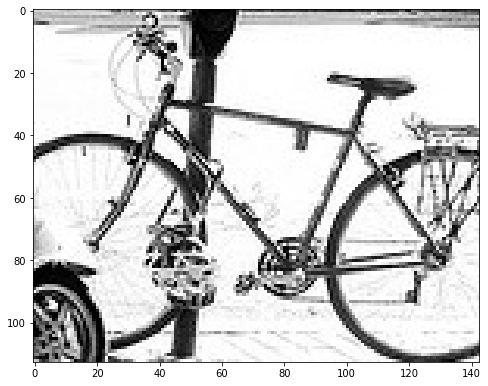

'saved to /tmp/tmpgypin4da/crops/bicycle--2/124710.png'

{
    "id": 2,
    "name": "bicycle",
    "supercategory": "vehicle"
}

'image: shape=(427, 640, 3) size=819840'

'box: shape=(247, 264, 3) size=195624'

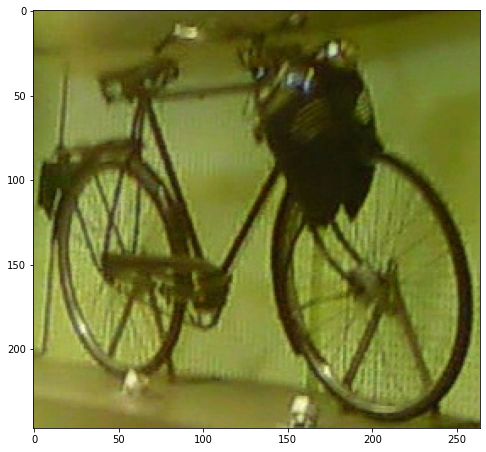

'saved to /tmp/tmpgypin4da/crops/bicycle--2/124713.png'

{
    "id": 3,
    "name": "car",
    "supercategory": "vehicle"
}

'image: shape=(427, 640, 3) size=819840'

'box: shape=(28, 50, 3) size=4200'

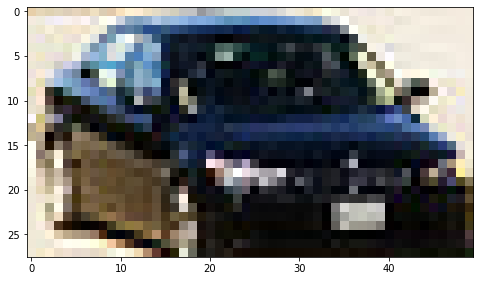

'saved to /tmp/tmpgypin4da/crops/car--3/131774.png'

{
    "id": 3,
    "name": "car",
    "supercategory": "vehicle"
}

'image: shape=(326, 500, 3) size=489000'

'box: shape=(89, 224, 3) size=59808'

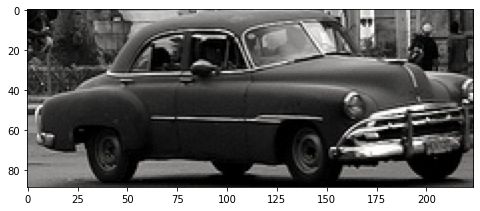

'saved to /tmp/tmpgypin4da/crops/car--3/131812.png'

{
    "id": 1,
    "name": "person",
    "supercategory": "person"
}

'image: shape=(480, 640, 3) size=921600'

'box: shape=(320, 229, 3) size=219840'

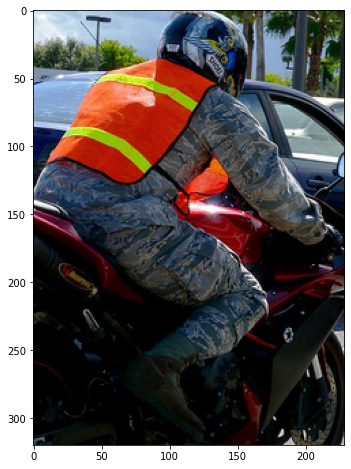

'saved to /tmp/tmpgypin4da/crops/person--1/183020.png'

{
    "id": 1,
    "name": "person",
    "supercategory": "person"
}

'image: shape=(427, 640, 3) size=819840'

'box: shape=(408, 433, 3) size=529992'

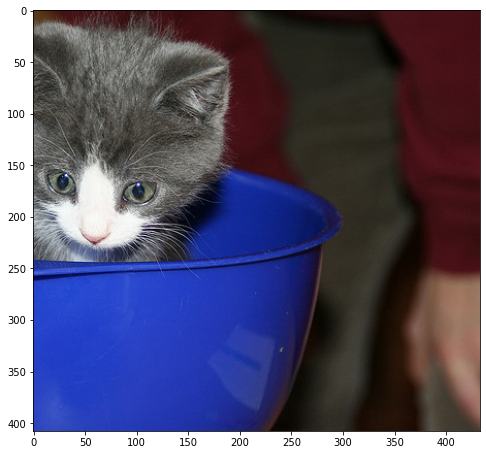

'saved to /tmp/tmpgypin4da/crops/person--1/183030.png'

In [ ]:
import json
from pathlib import Path
import tempfile

JSON_TREE_PATH = '../examples/coco_chunk/json_tree/'
CROP_TREE_PATH = tempfile.mktemp()

ann_files = !ls {JSON_TREE_PATH}/annotations

for ann_file in ann_files:
    ANN = f'{JSON_TREE_PATH}/annotations/{ann_file}'
    #! cat {ANN}
    ann = json.loads(Path(ANN).read_text())
    box = ann['bbox']

    IMG = f'{JSON_TREE_PATH}/images/{ann["image_id"]}.json'
    #! cat {IMG}
    img = json.loads(Path(IMG).read_text())

    CAT = f'{JSON_TREE_PATH}/categories/{ann["category_id"]}.json'
    ! cat {CAT}
    cat = json.loads(Path(CAT).read_text())

    IMG_PATH = f'{CROP_TREE_PATH}/images/{img["file_name"]}'
    IMG_URL = img["coco_url"]

    image = read_image(IMG_PATH, IMG_URL)
    display(f'image: shape={image.shape} size={image.size}')

    image_box = cut_bbox(image, box)
    display(f'box: shape={image_box.shape} size={image_box.size}')

    draw_image(image_box, figsize=(8, 8))

    cat_dir_name = f'{sanitize_filename(cat["name"])}--{cat["id"]}'
    CROP_PATH = f'{CROP_TREE_PATH}/crops/{cat_dir_name}/{ann["id"]}.png'

    write_image(image_box, CROP_PATH)
    display(f'saved to {CROP_PATH}')